In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score,roc_curve,roc_auc_score


In [2]:
df_train = pd.read_csv('train.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
print(f'length of df_train: {len(df_train)}')

length of df_train: 891


In [20]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [53]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

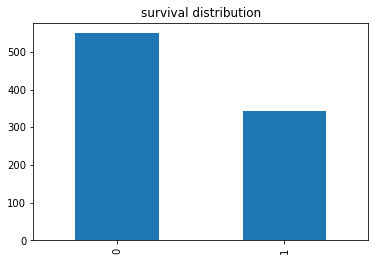

In [11]:
# plot distribution
df_train.Survived.value_counts().plot(kind='bar',title='survival distribution')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ED69D1D8E0>,
      dtype=object)

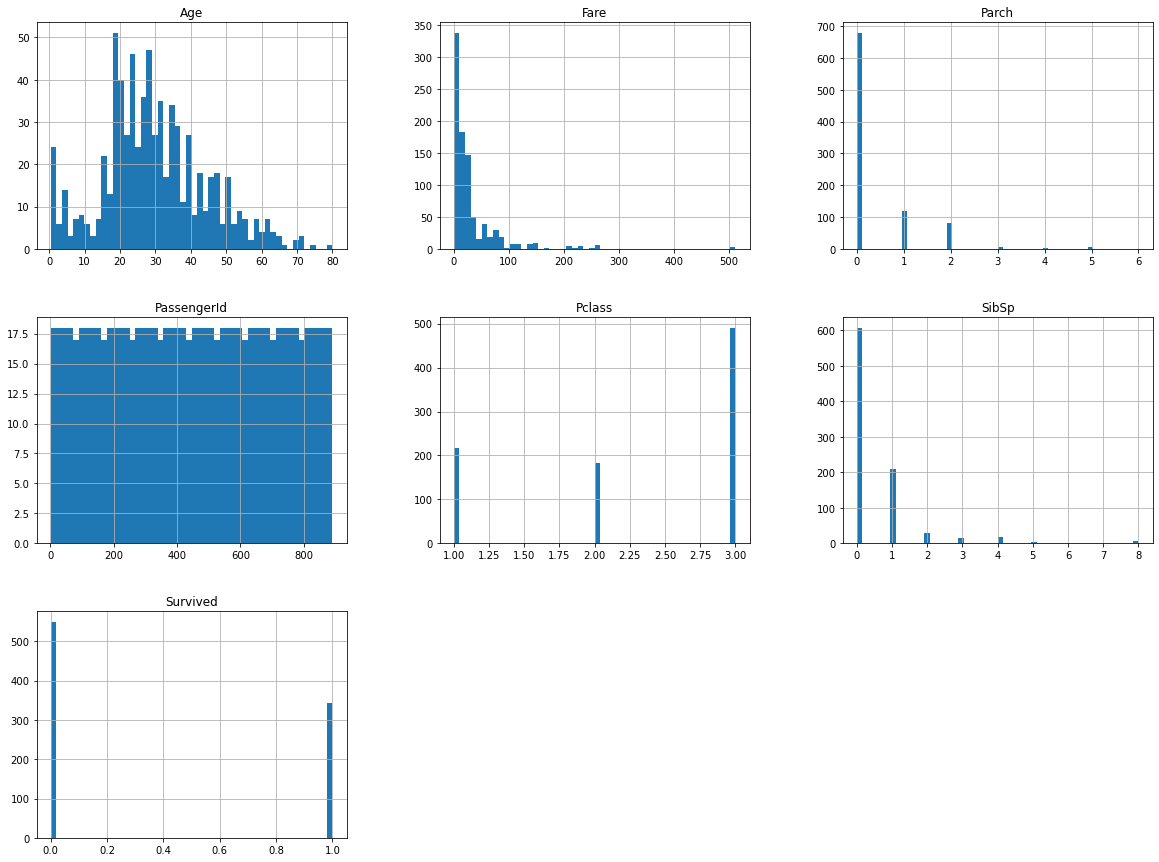

In [21]:
# plot histogram
%matplotlib inline
df_train.hist(bins=50, figsize=(20,15))

In [13]:
# see columns with null values
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
corr = df_train.corr()

In [24]:
corr["Fare"].sort_values(ascending=False)

Fare           1.000000
Survived       0.257307
Parch          0.216225
SibSp          0.159651
Age            0.096067
PassengerId    0.012658
Pclass        -0.549500
Name: Fare, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ED6C5CCFA0>,
      dtype=object)

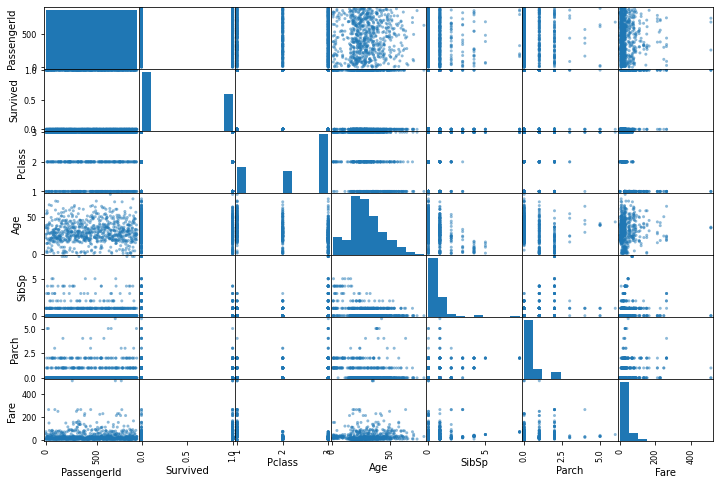

In [27]:
attributes = ['Survived','Pclass','Sex','Age''SibSp','Parch','Fare','Cabin','Embarked'] 
scatter_matrix(df_train,figsize=(12,8))

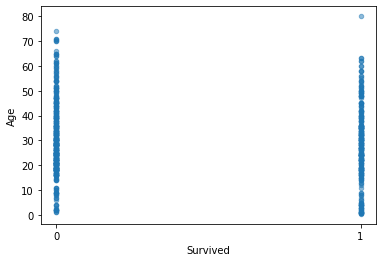

In [40]:
df_train.plot(kind='scatter',x='Survived',y='Age',alpha=0.5,xticks=[0,1])

In [62]:
num_attribs = ['Age','SibSp','Parch','Fare']
cat_attribs = ['Survived','Pclass']

## Train test split

In [81]:
from sklearn.model_selection import train_test_split
X = df_train.loc[:,['Age','SibSp','Parch','Fare','Pclass']]
y = df_train.loc[:,['Survived']]

In [96]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [97]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [98]:
# Create pipeline
num_pipeline = Pipeline([
                ('imputer',SimpleImputer(strategy='mean')),
                ('std_scaler', StandardScaler()),
])

In [105]:
num_attribs = ['Age','SibSp','Parch','Fare']
cat_attribs = ['Pclass']
full_pipeline = ColumnTransformer([
                ("num",num_pipeline,num_attribs),
                ("cat",OneHotEncoder(handle_unknown='ignore'),cat_attribs)],
                remainder='drop')

In [106]:
X_train.head()

,Age,SibSp,Parch,Fare,Pclass
331,45.5,0,0,28.5000,1
733,23.0,0,0,13.0000,2
382,32.0,0,0,7.9250,3
704,26.0,1,0,7.8542,3
813,6.0,4,2,31.2750,3


In [107]:
y_train.head()

,Survived
331,0
733,0
382,0
704,0
813,0


In [109]:
X_train = full_pipeline.fit_transform(X_train)

In [112]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [113]:
clf.predict(X_train[:2, :])

array([0, 1], dtype=int64)

In [115]:
clf.score(X_train, y_train)

0.6910112359550562

In [121]:
y_train_pred = clf.predict(X_train)

In [126]:
precision = precision_score(y_train,y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train,y_train_pred)

In [129]:
print(f'precision : {precision:.2f}')
print(f'recall : {recall:.2f}')
print(f'f1 : {f1:.2f}') 

precision : 0.64
recall : 0.42
f1 : 0.50


In [130]:
probs = clf.predict_proba(X_test)
preds = probs[:,1]

In [133]:
fpr, tpr, threshold = roc_curve(y_test, preds)

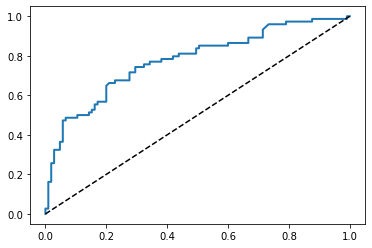

In [136]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth = 2, label=label)
    plt.plot([0,1],[0,1],'k--')

plot_roc_curve(fpr, tpr)
plt.show()

## Peformance on test data

In [118]:
X_test = full_pipeline.transform(X_test)

In [119]:
clf.score(X_  test, y_test)

0.7318435754189944